In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sn



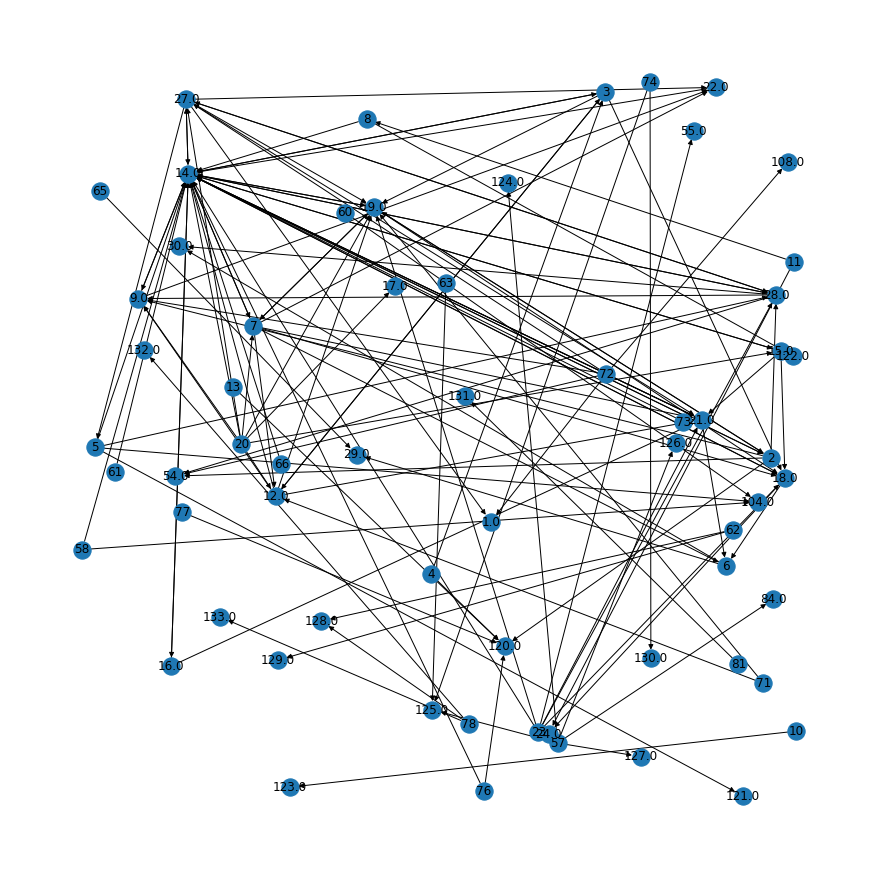

centrality:  [(14.0, 0.5483870967741935), (19.0, 0.2096774193548387), (18.0, 0.1774193548387097), (27.0, 0.1774193548387097), (28.0, 0.16129032258064516), (7, 0.16129032258064516), (21.0, 0.16129032258064516), (12.0, 0.14516129032258063), (2, 0.12903225806451613), (9.0, 0.12903225806451613), (20, 0.12903225806451613), (3, 0.11290322580645161), (72, 0.11290322580645161), (23, 0.0967741935483871), (120.0, 0.08064516129032258), (5, 0.08064516129032258), (6, 0.08064516129032258), (15.0, 0.08064516129032258), (57, 0.08064516129032258), (22.0, 0.06451612903225806), (54.0, 0.04838709677419355), (104.0, 0.04838709677419355), (8, 0.04838709677419355), (16.0, 0.04838709677419355), (125.0, 0.04838709677419355), (60, 0.04838709677419355), (78, 0.04838709677419355), (4, 0.03225806451612903), (29.0, 0.03225806451612903), (30.0, 0.03225806451612903), (11, 0.03225806451612903), (24.0, 0.03225806451612903), (1.0, 0.03225806451612903), (58, 0.03225806451612903), (62, 0.03225806451612903), (128.0, 0.0322

In [2]:
#load the data files
df_inf_part = pd.read_csv ('resources/influence_agroconcept.csv',index_col=False,header=0).dropna()
df_inf_nonpart = pd.read_csv ('resources/influence_nonagroconcept.csv',index_col=False,header=0).dropna()
frames =[df_inf_part , df_inf_nonpart]
df_combined = pd.concat(frames)

#node network
G3= nx.from_pandas_edgelist(df_combined, source='sender_id', target='receiver_id', edge_attr=["influence_x","influence_y"],create_using=nx.DiGraph()) 
nx.draw_random(G3,with_labels=True)
plt.show()

from decimal import *
node_max_degree = None  # the node which has the largest degree centrality value. This should be an integer. 
val_deg = None          # the centrality value of the node with the largest degree centrality. This should be a float. 

#calculate centrality
deg_dict = nx.degree_centrality(G3)
centrality_matrix = sorted(deg_dict.items(), key=lambda item:item[1],reverse=True)
maximum= centrality_matrix[0]
node_max_degree = maximum[0]
val_deg = maximum[1]


#calculate betweenness
bc = nx.betweenness_centrality(G3)
bc_dict = sorted(bc.items(), key=lambda item:item[1],reverse=True)#[-5:])
print('centrality: ',centrality_matrix)
print('\n--- ')
print('betweenness: ' ,bc_dict)